# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
#!pip install seaborn
import seaborn as sns
import seaborn as sb
#!pip install plotly
import plotly.graph_objects as go
#!pip install folium
#!pip install statsmodels
#import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from folium.plugins import MarkerCluster
#from folium import plugins
#from folium.plugins import FastMarkerCluster
#from folium.plugins import HeatMap


In [ ]:
#Step 1:

In [5]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url, header=0, sep=",")

#diccionario
#https://github.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/blob/main/Data-Dictionary.csv


In [ ]:
#Step 2:



In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
139,5,105,72,29,325,36.9,0.159,28,0
604,4,183,0,0,0,28.4,0.212,36,1
15,7,100,0,0,0,30.0,0.484,32,1
322,0,124,70,20,0,27.4,0.254,36,1
307,0,137,68,14,148,24.8,0.143,21,0


In [20]:
df[df['Pregnancies']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
16,0,118,84,47,230,45.8,0.551,31,1
45,0,180,66,39,0,42.0,1.893,25,1
57,0,100,88,60,110,46.8,0.962,31,0
58,0,146,82,0,0,40.5,1.781,44,0
...,...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21,0
727,0,141,84,26,0,32.4,0.433,22,0
736,0,126,86,27,120,27.4,0.515,21,0
753,0,181,88,44,510,43.3,0.222,26,1


In [22]:
len(df[df['BloodPressure']==0])


35

In [23]:
len(df[df['Insulin']==0])


374

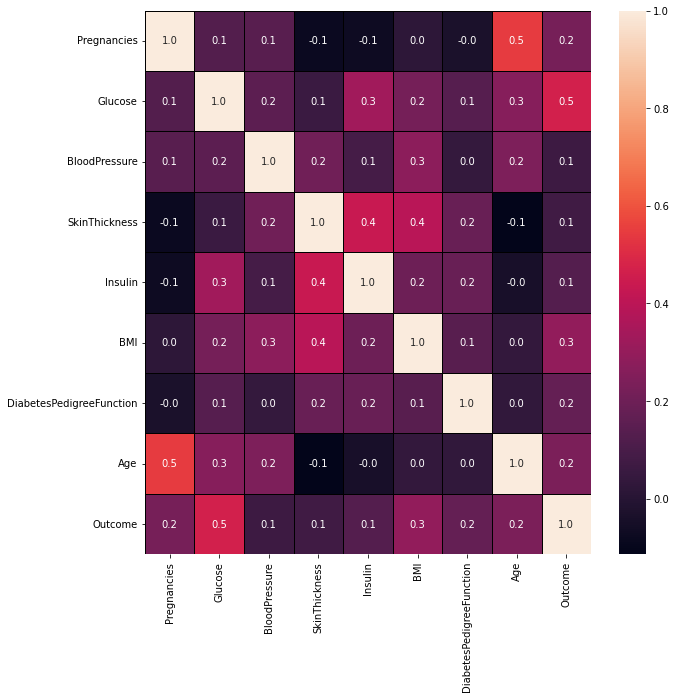

In [29]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [30]:
df['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [31]:
df['Insulin'].value_counts()


0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [24]:
len(df[df['BMI']==0])


11

In [41]:
#limpieza de datos
#insulina
df_0=df[(df['Outcome']==0) & (df["Insulin"] > 0)]
insuline_mean_0=df_0['Insulin'].mean()

df_no0=df[(df['Outcome']!=0) & (df["Insulin"] > 0)]
insuline_mean_no0=df_no0['Insulin'].mean()

In [46]:
def insulina(insulin_value, outcome_value, insuline_mean_0,insuline_mean_no0):
    if outcome_value==0 and insulin_value==0:
        return insuline_mean_0
    elif outcome_value==1 and insulin_value==0:
        return insuline_mean_no0
    else:
        return insulin_value

In [49]:
df['Insulin'] = df.apply(lambda x: insulina(x['Insulin'], x['Outcome'],insuline_mean_0,insuline_mean_no0), axis=1)

In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insuline
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,157.003527,31.992578,0.471876,33.240885,0.348958,157.003527
std,3.369578,31.972618,19.355807,15.952218,88.860914,7.884160,0.331329,11.760232,0.476951,88.860914
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000,14.000000
25%,1.000000,99.000000,62.000000,0.000000,121.500000,27.300000,0.243750,24.000000,0.000000,121.500000
50%,3.000000,117.000000,72.000000,23.000000,130.287879,32.000000,0.372500,29.000000,0.000000,130.287879
75%,6.000000,140.250000,80.000000,32.000000,206.846154,36.600000,0.626250,41.000000,1.000000,206.846154
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,846.000000


In [52]:
#limpieza de datos
#bmi
df_0=df[(df['Outcome']==0) & (df["BMI"] > 0)]
bmi_mean_0=df_0['BMI'].mean()

df_no0=df[(df['Outcome']!=0) & (df["BMI"] > 0)]
bmi_mean_no0=df_no0['BMI'].mean()

def BMI_fun(bmi_value, outcome_value, bmi_mean_0,bmi_mean_no0):
    if outcome_value==0 and bmi_value==0:
        return bmi_mean_0
    elif outcome_value==1 and bmi_value==0:
        return bmi_mean_no0
    else:
        return bmi_value

In [55]:
df['BMI'] = df.apply(lambda x: BMI_fun(x['BMI'], x['Outcome'],bmi_mean_0,bmi_mean_no0), axis=1)

In [54]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insuline
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,157.003527,32.44642,0.471876,33.240885,0.348958,157.003527
std,3.369578,31.972618,19.355807,15.952218,88.860914,6.87897,0.331329,11.760232,0.476951,88.860914
min,0.000000,0.000000,0.000000,0.000000,14.000000,18.20000,0.078000,21.000000,0.000000,14.000000
25%,1.000000,99.000000,62.000000,0.000000,121.500000,27.50000,0.243750,24.000000,0.000000,121.500000
50%,3.000000,117.000000,72.000000,23.000000,130.287879,32.05000,0.372500,29.000000,0.000000,130.287879
75%,6.000000,140.250000,80.000000,32.000000,206.846154,36.60000,0.626250,41.000000,1.000000,206.846154
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000,846.000000


In [56]:
#limpieza de datos
#Glucose
df_0=df[(df['Outcome']==0) & (df["Glucose"] > 0)]
glucose_mean_0=df_0['Glucose'].mean()

df_no0=df[(df['Outcome']!=0) & (df["Glucose"] > 0)]
glucose_mean_no0=df_no0['Glucose'].mean()

def glucose_fun(glucose_value, outcome_value, glucose_mean_0,glucose_mean_no0):
    if outcome_value==0 and glucose_value==0:
        return glucose_mean_0
    elif outcome_value==1 and glucose_value==0:
        return glucose_mean_no0
    else:
        return glucose_value

In [57]:
df['Glucose'] = df.apply(lambda x: glucose_fun(x['Glucose'], x['Outcome'],glucose_mean_0,glucose_mean_no0), axis=1)

In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insuline
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,69.105469,20.536458,157.003527,32.44642,0.471876,33.240885,0.348958,157.003527
std,3.369578,30.462008,19.355807,15.952218,88.860914,6.87897,0.331329,11.760232,0.476951,88.860914
min,0.000000,44.000000,0.000000,0.000000,14.000000,18.20000,0.078000,21.000000,0.000000,14.000000
25%,1.000000,99.750000,62.000000,0.000000,121.500000,27.50000,0.243750,24.000000,0.000000,121.500000
50%,3.000000,117.000000,72.000000,23.000000,130.287879,32.05000,0.372500,29.000000,0.000000,130.287879
75%,6.000000,141.000000,80.000000,32.000000,206.846154,36.60000,0.626250,41.000000,1.000000,206.846154
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000,846.000000


In [59]:
#limpieza de datos
#BloodPressure
df_0=df[(df['Outcome']==0) & (df["BloodPressure"] > 0)]
BloodPressure_mean_0=df_0['BloodPressure'].mean()

df_no0=df[(df['Outcome']!=0) & (df["BloodPressure"] > 0)]
BloodPressure_mean_no0=df_no0['BloodPressure'].mean()

def BloodPressure_fun(BloodPressure_value, outcome_value, BloodPressure_mean_0,BloodPressure_mean_no0):
    if outcome_value==0 and BloodPressure_value==0:
        return BloodPressure_mean_0
    elif outcome_value==1 and BloodPressure_value==0:
        return BloodPressure_mean_no0
    else:
        return BloodPressure_value

In [60]:
df['BloodPressure'] = df.apply(lambda x: BloodPressure_fun(x['BloodPressure'], x['Outcome'],BloodPressure_mean_0,BloodPressure_mean_no0), axis=1)

In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insuline
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,20.536458,157.003527,32.44642,0.471876,33.240885,0.348958,157.003527
std,3.369578,30.462008,12.106044,15.952218,88.860914,6.87897,0.331329,11.760232,0.476951,88.860914
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.20000,0.078000,21.000000,0.000000,14.000000
25%,1.000000,99.750000,64.000000,0.000000,121.500000,27.50000,0.243750,24.000000,0.000000,121.500000
50%,3.000000,117.000000,72.000000,23.000000,130.287879,32.05000,0.372500,29.000000,0.000000,130.287879
75%,6.000000,141.000000,80.000000,32.000000,206.846154,36.60000,0.626250,41.000000,1.000000,206.846154
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000,846.000000


In [62]:
#limpieza de datos
#SkinThickness
df_0=df[(df['Outcome']==0) & (df["SkinThickness"] > 0)]
SkinThickness_mean_0=df_0['SkinThickness'].mean()

df_no0=df[(df['Outcome']!=0) & (df["SkinThickness"] > 0)]
SkinThickness_mean_no0=df_no0['SkinThickness'].mean()

def SkinThickness_fun(SkinThickness_value, outcome_value, SkinThickness_mean_0,SkinThickness_mean_no0):
    if outcome_value==0 and SkinThickness_value==0:
        return SkinThickness_mean_0
    elif outcome_value==1 and SkinThickness_value==0:
        return SkinThickness_mean_no0
    else:
        return SkinThickness_value

In [64]:
df['SkinThickness'] = df.apply(lambda x: SkinThickness_fun(x['SkinThickness'], x['Outcome'],SkinThickness_mean_0,SkinThickness_mean_no0), axis=1)

In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insuline
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958,157.003527
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951,88.860914
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000,14.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000,121.500000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000,130.287879
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000,206.846154
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000,846.000000


In [ ]:
##generico

def set_value (data_value, outcome_value,mean_nodiab,mean_diab):
    if (outcome_value == 0 and data_value==0):
        return mean_nodiab
    elif (outcome_value ==1 and data_value ==0 ):
        return mean_diab
    else:
        return data_value

#calc the mean for diabetic and not diabetic that the data is not 0
def set_use_mean (name_col):
    meanNoDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==0)][name_col].mean()
    meanDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==1)][name_col].mean()

df_raw[name_col] = df_raw.apply(lambda x: set_value(x[name_col], x['Outcome'],meanNoDiab,meanDiab), axis=1)

set_use_mean('Insulin')
df_raw.describe()